# Project

In [1]:
student_name = 'Salih Kilicli'

# Random Walks

A random walk is a stochastic or random process that describes a path of successive random steps on some mathematical space.

In this project we will implement simple random walks on a regular grid of integers, where steps will be +1 or -1 along a single coordinate direction.

## Instructions

1. Write a function, `random_step`, that takes the current position (list) as an argument and returns the next position (list) of a random walk.  This function should also take as an argument the distribution from which the direction of the step should be drawn. 
    1. Both the input position and the output position are expected to be lists.
    1. You may choose how to implement and interpret the distribution argument, however you are strongly encouraged to review and use the functions available in [NumPy](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html)
    1. The test code will, by default, pass `None` as the distribution argument.  Your code should utilize some default distribution if `None` is passed.
    1. You should test your code with several distributions by modifying the value of distribution in the test block.
1. Write a function, `random_walk`, that uses `random_step` to produce a random walk of `100` steps.  The function should return the history of positions in the walk as a list of lists. E.g. `[ [0,0], [-1,0], ..., [5,7], [5,6] ]`.
1. Perform a Monte Carlo simulation that executes your random walk `10,000` times, where each random walk consists of the same number of steps.  
    1. Create a list of all final positions from the `10,000` random walks.  This should be stored in the variable `final_positions` and be a list of lists, similar to the history returned by `random_walk`.  The test code will produce a scatter plot of your results.
    1. Create a list of average distances over all random walks at each time step [0, max_steps], and store the result in `avg_dist_t`.  The test code will plot your results.


Note: For this assignment you are only required to produce a solution that works in 2D, however your solution will likely require very few, if any, changes to work for any dimension.  

## Submitting Your Assignment

You will submit your completed assignment in two formats:

- Jupyter Notebook (.ipynb)
- HTML (.html)

##### Jupyter Notebook (.ipynb)
You may directly use this notebook to complete your assignment or you may use an external editor/IDE of your choice.  However, to submit your code please ensure that your code works in this notebook.  
  
##### HTML (.html)
To create an HTML file for your assignment simply select `File > Download as > HTML (.html)` from within the Jupyter Notebook.  
  
Both files should be uploaded to [Canvas](https://canvas.tamu.edu).

## Hint

There are many ways to implement your distribution functions.  Since we ultimately want to select a coordinate direction you will likely need to generate an integer either directly or indirecly.  For instance, `np.random.randint(a,b)` returns an integer in the range [a,b).  Also, `round()` will round floating point numbers to the nearest integer.

When asked to implement a function that takes another function as a parameter you can use the following template:

In [2]:
def f(a):
    print('f(a) =', a)
    
def g(func, b):
    print('g(func,b):')
    return func(b)
    
g(f,9)

g(func,b):
f(a) = 9


## Your Solution (1)

Complete the `random_step` function below.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='rainbow')

%matplotlib inline

# Small random walk exercise :)
import copy

def add_noise(l, noise, dimension):
    i = np.random.randint(low = 0, high = dimension)
    l[i] += noise 
    return l

def random_walk0(initial_position=None, distribution=None, dimension=3, step_size=10):

    if initial_position == None:
        initial_position = [0]*dimension
                
    history = [initial_position]
    for i in range(step_size):
        noise = (-1)**np.random.randint(low = 0, high = 2)
        history.append(add_noise(copy.deepcopy(history[i]), noise, dimension))
    
    return np.array(history)

print(random_walk0())

[[ 0  0  0]
 [ 0  1  0]
 [ 0  1  1]
 [ 0  0  1]
 [ 0  0  2]
 [ 0 -1  2]
 [ 1 -1  2]
 [ 1 -2  2]
 [ 1 -3  2]
 [ 2 -3  2]
 [ 2 -2  2]]


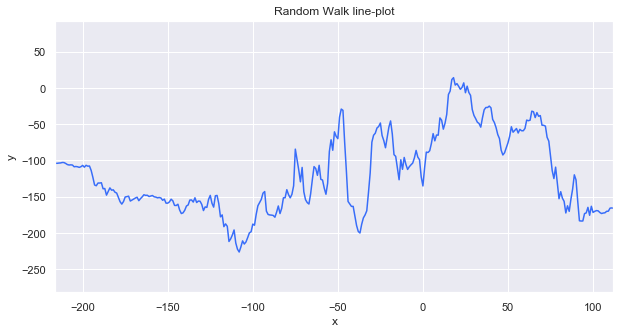

In [4]:
nsteps = 10**5

plt.figure(figsize = (10, 5))
x, y, *_ = zip(*random_walk0(initial_position=None, distribution=None, dimension=2, step_size=nsteps))
#print(f'x = {np.array(x)}\n\n y = {np.array(y)}')

sns.lineplot(x, y, ci = None)
plt.title('Random Walk line-plot')
plt.xlabel('x'); plt.xlim(min(x), max(x))
plt.ylabel('y'); plt.ylim(min(y), max(y))
plt.show()

Note: I am __not__ quite sure why plot doesn't pass through the origin even though the first element is [0, 0] obviously.

In [5]:
random_walk0(initial_position=None, distribution=None, dimension=2, step_size=nsteps)[0]

array([0, 0])

In [6]:
# To create reproducible codes
np.random.seed(2020)
   
def random_step(current_position, distribution):
    """
    This function takes the current position as a list and 
    a distribution from which the next step of the random 
    walk will be drawn.  The randomly chosen step will be 
    applied to the current position and the new position of 
    the random walk will be returned.
    
    current_position := current position of the drunk guy :)
    distribution := distribution function object from np.random
    """
    # Pick a noise using the distribution function
    if distribution == None:
        noise = (-1)**int(np.random.uniform(0, 2))
    else:
        assert type(distribution) == 'builtin_function_or_method',\
        'Distribution must be a function or a method from np.random library'
        noise = (-1)**int(distribution)
    
    # Pick an axis (index) randomly (notice len(current_position)=dimension )
    i = np.random.randint(low = 0, high = len(current_position))
    
    # Iterate the selected axis using given noise
    current_position[i] +=  noise
    
    return current_position

In [7]:
current = [0, 0]
print(current)
for i in range(5):
    a = random_step(current, distribution = None)
    print(a)

[0, 0]
[0, -1]
[0, -2]
[0, -1]
[1, -1]
[2, -1]


## Test Code (1)

After completing your function, `random_step()`, run the following code block to test and view your results.

In the test block below, the distribution function is set to `None` and passed to your function.  Your code should be able to take various distribution functions and produce random walks according to those distributions.

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as patches
import matplotlib.animation
from IPython.display import HTML
import numpy as np

def draw_next_step(step_idx):
    """
    Draws the next position in the random walk, by adding to the figure a
    line segment from the last position to the one returned by 
    random_step().  
    
    For dimensions > 2, only the first two values from the positions are
    used.
    """
    positions.append(random_step(positions[step_idx], distribution))
    if dimension > 1:
        l = mlines.Line2D([positions[step_idx]  [0],
                           positions[step_idx+1][0]], 
                          [positions[step_idx]  [1],
                           positions[step_idx+1][1]])
        current_pos = patches.Circle((positions[step_idx+1][0],
                                      positions[step_idx+1][1]),
                                     radius=0.5)
    else:
        l = mlines.Line2D([positions[step_idx]  [0],
                           positions[step_idx+1][0]],
                          [0,0])
        current_pos = patches.Circle((positions[step_idx+1][0], 0),
                                     radius=0.5)

    [p.remove() for p in reversed(axes.patches)] # clear previous draws
    l.set_color(plt.cm.plasma(step_idx/max_num_steps))
    axes.add_line(l)
    current_pos.set_color((1,0,0))
    axes.add_patch(current_pos)

    
    
def init():
    pass
    

    
# The maximum number of steps to be taken in the random walk
max_num_steps = 100
# The dimension of the space in which the random walk will occur
dimension = 2
# The history of positions in the random walk, initialized with the origin.
positions = [[0]*dimension]


# The distribution function to be used by the random walk
distribution = None


# Create figure and axes on which to draw
fig_size = 20 # Controls the size of the plot
fig, axes = plt.subplots(1)
axes.grid(True)
plt.xlim(-fig_size, fig_size)
plt.ylim(-fig_size, fig_size)
plt.close() # prevents the additional plot display of the final frame


# Create the animation
ani = matplotlib.animation.FuncAnimation(fig, draw_next_step, frames=max_num_steps, init_func=init)
# Generate HTML representation of the animation
display(HTML(ani.to_jshtml()))

## Your Solution (2)

Complete the `random_walk` function below.

In [9]:
def random_walk(max_steps=100, dimension=2, distribution=None):
    """
    Performs a random walk from the origin, consisting of max_steps steps.
    The history of positions in the random walk are returned as a list of 
    lists, e.g. [ [0,0], [-1,0], ..., [5,7], [5,6] ].
    """
    history = [[0]*dimension]
    for i in range(max_steps):
        history.append(random_step(copy.deepcopy(history[i]), distribution))
    
    return history

## Test Code (2)

After completing the `random_walk` function above, modify the call to `random_walk()` in the test code below to accomodate any parameters you require.  The test block below will verify that each step in the random walk history took no more than one step in any direction, and only along coordinate directions.  Note that the test block below optionally allows for a step in the random walk to be zero, i.e. stand still for a time.  If your distribution does not allow "stay" then set `allow_zero_step` to `False`.

In [10]:
# This flag modifies the testing below to allow for (True) or 
# disallow (False) a step that allows remains in the same position,
# i.e. stands still for a time step
allow_zero_step = False
max_steps = 100

history = random_walk(max_steps) # add any parameters that you require

if history is None or len(history) != 1+max_steps: # +1 includes the initial position
    print(f'History does not contain {max_steps} steps')
else:
    for i in range(len(history)-1):
        pos_i = history[i]
        pos_j = history[i+1]
        num_moves = sum([abs(x-y) for x,y in zip(pos_i, pos_j)])
        if not allow_zero_step and num_moves is 0:
            print(f'Step {i}->{i+1} stayed in the same location')
            break
        if num_moves > 1:
            print(f'Step {i}->{i+1} is either longer than one or in more than one coordinate direction')
            break
    else:
        print('All steps appear to be valid')

All steps appear to be valid


## Your Solution (3)

Write code to complete the Monte Carlo simulation below.

Perform a Monte Carlo simulation that executes your random walk 10,000 times, where each random walk consists of the same number of steps.
Create a list of all final positions from the 10,000 random walks. This should be stored in the variable final_positions and be a list of lists, similar to the history returned by random_walk. The test code will produce a scatter plot of your results.
Create a list of average distances over all random walks at each time step [0, max_steps], and store the result in avg_dist_t. The test code will plot your results.

In [11]:
num_trials = 10000
max_num_steps = 100

# Use this variable to store a list of all final positions from the 10,000
# random walks. e.g. [ [-3,5], [50,0], ..., [9,13]]
# len(final_positions) = num_trials
final_positions = []
all_positions = []
for j in range(num_trials):
    all_positions.append(random_walk(max_num_steps))
    final_positions.append(all_positions[j][max_num_steps])
    
assert len(final_positions) == num_trials, 'final_positions vector must have num_trials elements'

# Use this variable to store a list of the average distance from the 
# origin over all random walks.  
# len(avg_dist_t) = max_num_steps
avg_dist_t = []
for i in range(max_num_steps):
    summ = 0
    for j in range(num_trials):
        summ += np.linalg.norm(all_positions[j][i])
    
    avg = summ/num_trials
    avg_dist_t.append(avg) 
        
assert len(avg_dist_t) == max_num_steps, 'avg_dist_t vector must have max_num_steps elements'

In [12]:
len(all_positions)

10000

## Test Code (3)

The next two blocks will generate the plots using `final_positions` and `avg_dist_t`.

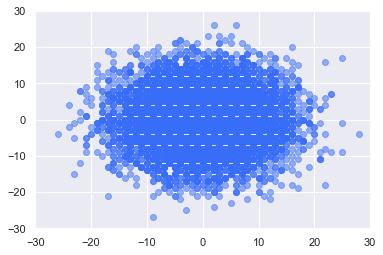

In [18]:
# Create figure and axes on which to draw
fig_size = 30 # Controls the size of the plot
fig, axes = plt.subplots(1)
axes.grid(True)
plt.xlim(-fig_size, fig_size)
plt.ylim(-fig_size, fig_size)

if len(final_positions) != num_trials:
    print("Incorrect number of final position found")
else:
    # use the first position in final_positions to determine the dimension
    dimension = len(final_positions[0])
    if dimension > 1:
        # unpack the final_positions list into a list of x-coords and y-coords
        x,y,*_ = zip(*final_positions) # *_ ignores any dimension > 2
        # plot the first two dimensions
        plt.scatter(x,y, alpha = 0.5)
    else:
        # plot the 1D data, set the y-coords to 0
        plt.scatter(final_positions, [0]*len(final_positions), alpha = 0.5)

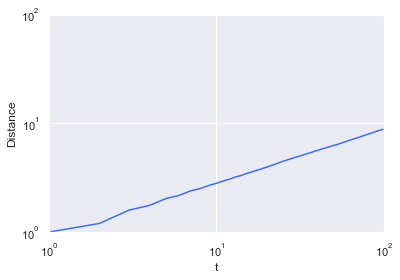

In [14]:
# Create figure and axes on which to draw
fig, axes = plt.subplots(1)
axes.set_xlabel('t')
axes.set_ylabel('Distance')
axes.grid(True)
plt.xlim(1, max_num_steps)
plt.ylim(1, max_num_steps)

# plot the average distances
plt.loglog(avg_dist_t)
plt.show()

# Question

You should see a line in a loglog plot. What is its slope and how does this compare with the 1d case discussed in class?

The __slope__ of log-log plot is $\dfrac{10}{10^2} = \dfrac{1}{10} = 0.1$. 

(I assume I missed the discussion in the class)